In [1]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/content/glass.csv")

In [3]:
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

RI          Na          Mg  ...          Ba          Fe        Type
count  214.000000  214.000000  214.000000  ...  214.000000  214.000000  214.000000
mean     1.518365   13.407850    2.684533  ...    0.175047    0.057009    2.780374
std      0.003037    0.816604    1.442408  ...    0.497219    0.097439    2.103739
min      1.511150   10.730000    0.000000  ...    0.000000    0.000000    1.000000
25%      1.516522   12.907500    2.115000  ...    0.000000    0.000000    1.000000
50%      1.517680   13.300000    3.480000  ...    0.000000    0.000000    2.000000
75%      1.519157   13.825000    3.600000  ...    0.000000    0.100000    3.000000
max      1.533930   17.380000    4.490000  ...    3.150000    0.510000    7.000000

[8 rows x 10 columns]

In [35]:
df.corr()

RI        Na        Mg  ...        Ba        Fe      Type
RI    1.000000 -0.191885 -0.122274  ... -0.000386  0.143010 -0.164237
Na   -0.191885  1.000000 -0.273732  ...  0.326603 -0.241346  0.502898
Mg   -0.122274 -0.273732  1.000000  ... -0.492262  0.083060 -0.744993
Al   -0.407326  0.156794 -0.481799  ...  0.479404 -0.074402  0.598829
Si   -0.542052 -0.069809 -0.165927  ... -0.102151 -0.094201  0.151565
K    -0.289833 -0.266087  0.005396  ... -0.042618 -0.007719 -0.010054
Ca    0.810403 -0.275442 -0.443750  ... -0.112841  0.124968  0.000952
Ba   -0.000386  0.326603 -0.492262  ...  1.000000 -0.058692  0.575161
Fe    0.143010 -0.241346  0.083060  ... -0.058692  1.000000 -0.188278
Type -0.164237  0.502898 -0.744993  ...  0.575161 -0.188278  1.000000

[10 rows x 10 columns]

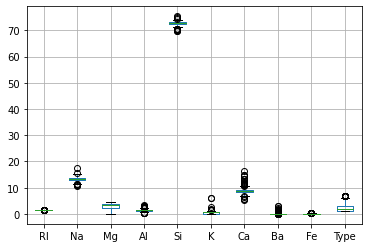

In [6]:
df.boxplot()

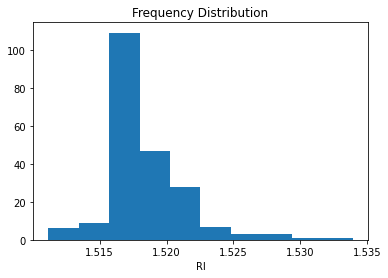

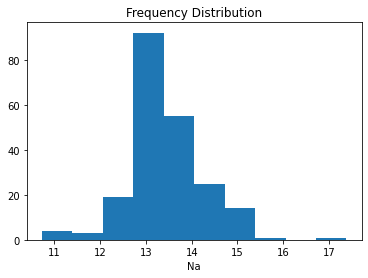

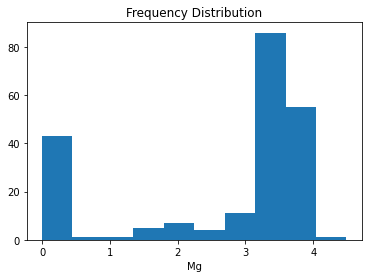

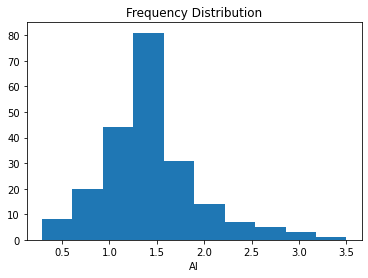

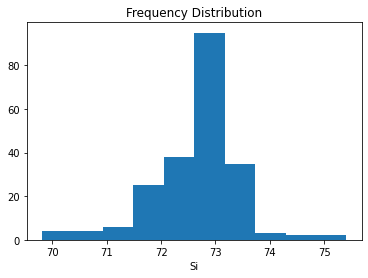

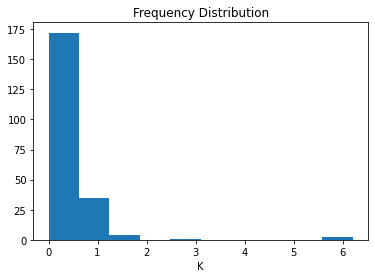

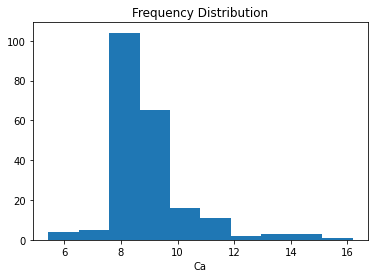

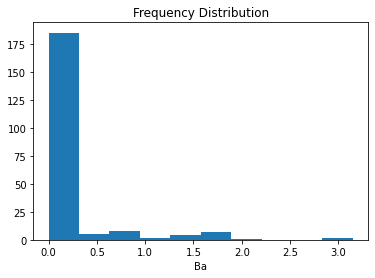

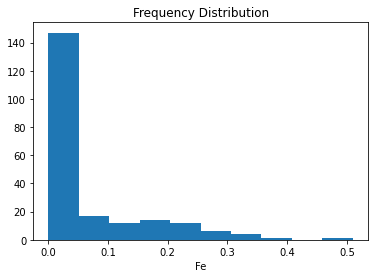

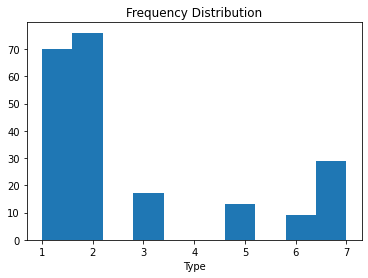

In [7]:
col=["RI","Na",	"Mg",	"Al",	"Si",	"K",	"Ca"	,"Ba","Fe"	,"Type"]
for i in col:
    plt.hist(df[i])
    plt.title("Frequency Distribution")
    plt.xlabel(i)
    plt.show()

# Splitting data

In [8]:
x=df.iloc[:,0:-1]
y=df["Type"]

In [9]:
x

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]

Training and testing model using train_test_split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train,y_train)
predict=model1.predict(X_test)
accr=np.mean(predict==y_test)
accr

0.7037037037037037

Using kFold for better accurancy

In [11]:

kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.5257575757575758


In [12]:
results

array([0.45454545, 0.77272727, 0.59090909, 0.77272727, 0.28571429,
       0.61904762, 0.42857143, 0.14285714, 0.23809524, 0.95238095])

### Grid Search for Algorithm hyperparameter Tuning

In [13]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40])}

In [14]:
model = KNeighborsClassifier()

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)
print("Done")

Done


In [15]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


In [16]:

kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=1)
results2 = cross_val_score(model, x, y, cv=kfold)
print("Accurancy is",results2.mean()*100,"%")

Accurancy is 55.995670995670984 %


In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [18]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [19]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [20]:
# evaluate predictions
accuracy_XGBM = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy_XGBM * 100.0))

Accuracy: 79.63%


In [25]:
final=pd.DataFrame({"KNN_train_test_split":(accr),"KNN_KFOLD":(np.round(results2.mean()*100)),"XGBM":(accuracy_XGBM)},index=[0])
final

KNN_train_test_split  KNN_KFOLD      XGBM
0              0.703704       56.0  0.796296

In [ ]:
["Method",
[Accurancy,accr,(np.round(results2.mean()*100)),(accuracy_XGBM)]

In [34]:
final=pd.DataFrame({"Method":["KNN_train_test_split","KNN_KFOLD","XGBM"],"Accurancy in percentage":[np.round(accr*100,4),(np.round(results2.mean()*100,4g)),np.round(accuracy_XGBM*100,4)]})
final

Method  Accurancy in percentage
0  KNN_train_test_split                  70.3704
1             KNN_KFOLD                  55.9957
2                  XGBM                  79.6296